<a href="https://colab.research.google.com/github/akhils-codes1/ML4Crypto-2022/blob/main/1_Random_vs_AES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 21.2 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/MyDrive/1_Random_vs_AES

Random_vs_AES  Random_vs_AES.zip


In [ ]:
%cd /content/gdrive/MyDrive/1_Random_vs_AES

/content/gdrive/MyDrive/1_Random_vs_AES


In [ ]:
!ls

Random_vs_AES  Random_vs_AES.zip


In [ ]:
!unzip '/content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES.zip' -d '/content/gdrive/MyDrive/1_Random_vs_AES'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10672.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10731.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10767.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10799.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10812.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10851.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10861.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10886.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10906.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10911.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES/0_10987.png  
  inflating: /content/gdrive/MyDrive/1_Random_vs_AES/Rando

In [ ]:
path = Path('/content/gdrive/MyDrive/1_Random_vs_AES/Random_vs_AES')

In [ ]:
files = get_image_files(path)
#files[0]

In [ ]:
len(files)

0

In [ ]:
pat = r'^(.*)_\d+.png'

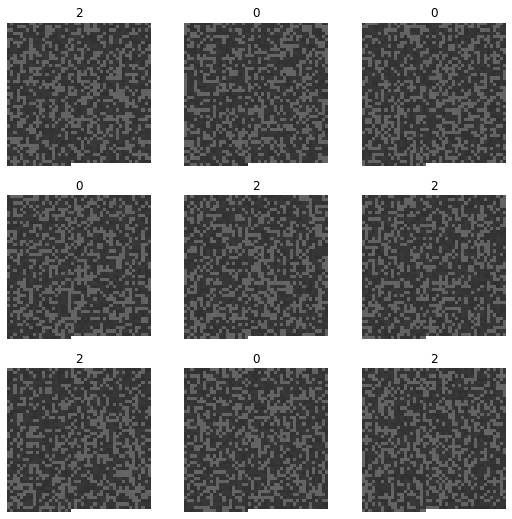

In [ ]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()

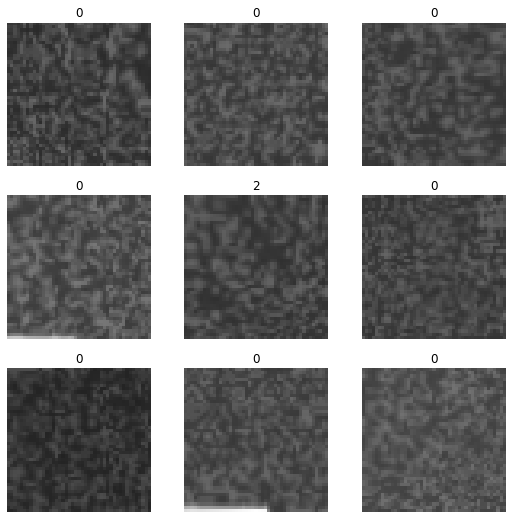

In [ ]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

#ConvNext

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth" to /root/.cache/torch/hub/checkpoints/convnext_nano_d1h-7eb4bdea.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.760185,0.700741,0.498938,01:38


epoch,train_loss,valid_loss,accuracy,time
0,0.705453,0.700638,0.503061,01:48
1,0.708411,0.707155,0.500437,01:44
2,0.708769,0.705278,0.496689,01:49
3,0.712299,0.751309,0.507310,01:48
4,0.704499,0.704686,0.503561,01:45
5,0.703012,0.697524,0.500937,01:48
6,0.698863,0.697313,0.503436,01:44
7,0.696179,0.694639,0.506685,01:48
8,0.690462,0.697424,0.499063,01:44
9,0.689011,0.696995,0.502062,01:47


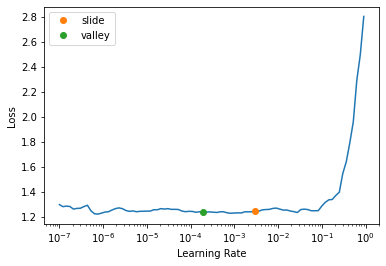

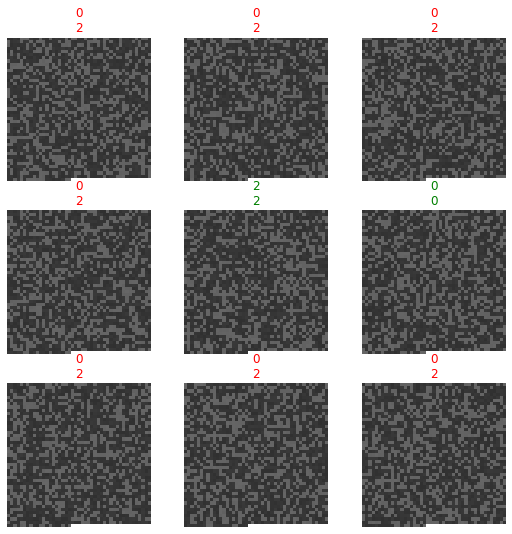

In [ ]:
architecture = 'convnext_nano'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.769614,0.699329,0.496689,01:36


epoch,train_loss,valid_loss,accuracy,time
0,0.712610,0.712839,0.498063,01:46
1,0.704454,0.695088,0.498688,01:43
2,0.709792,0.696891,0.498813,01:46
3,0.707852,0.694991,0.494190,01:46
4,0.705330,0.696428,0.501937,01:43
5,0.702739,0.693207,0.504311,01:47
6,0.699372,0.693834,0.502062,01:43
7,0.695850,0.693291,0.500187,01:46
8,0.697271,0.693363,0.500312,01:43
9,0.695797,0.693229,0.499063,01:48


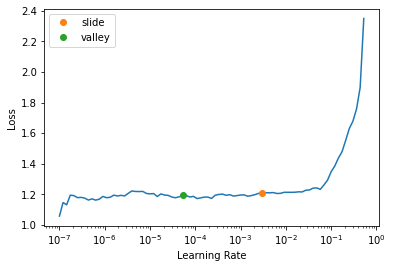

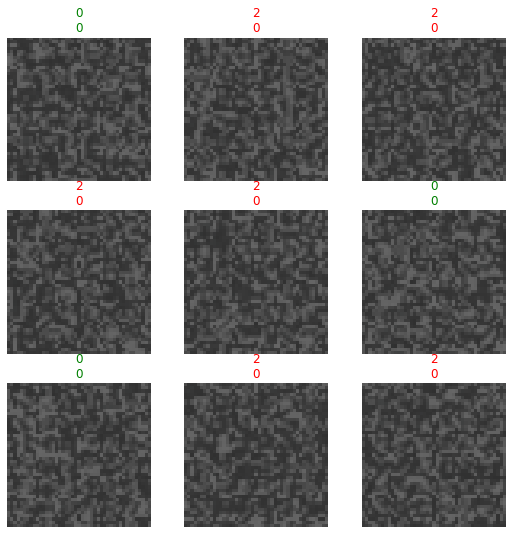

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNet34

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34-43635321.pth" to /root/.cache/torch/hub/checkpoints/resnet34-43635321.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.793243,0.746109,0.506685,01:38


epoch,train_loss,valid_loss,accuracy,time
0,0.707461,0.705557,0.507560,01:45
1,0.723196,0.707485,0.497938,01:44
2,0.726977,0.712577,0.501937,01:41
3,0.716259,0.765997,0.509059,01:45
4,0.707961,0.713568,0.500812,01:41
5,0.695193,0.712948,0.501187,01:45
6,0.648961,0.760260,0.500562,01:41
7,0.571106,0.833798,0.496689,01:44
8,0.504668,0.894272,0.504686,01:45
9,0.486627,0.911526,0.504561,01:42


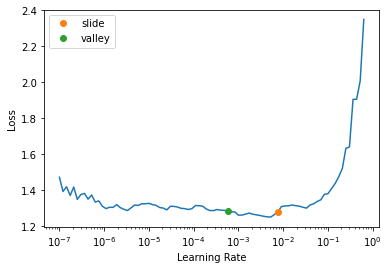

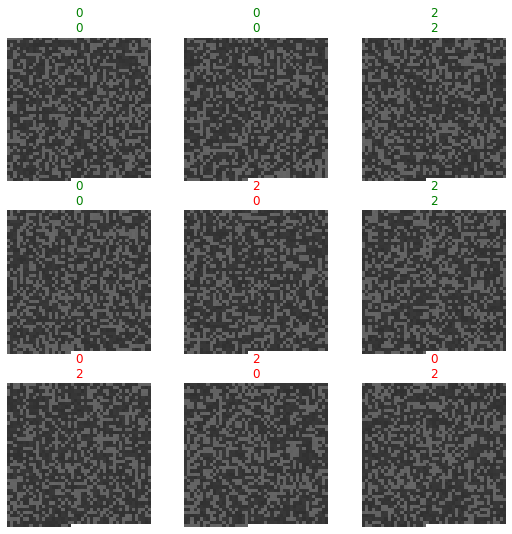

In [ ]:
architecture = 'resnet34'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.751583,0.725212,0.495814,01:37


epoch,train_loss,valid_loss,accuracy,time
0,0.700105,0.698419,0.499188,01:43
1,0.708815,0.704756,0.510184,01:43
2,0.709999,0.705567,0.493815,01:41
3,0.712286,0.698217,0.505311,01:42
4,0.706864,0.698906,0.505935,01:44
5,0.705088,0.695798,0.506310,01:44
6,0.701254,0.696653,0.496689,01:43
7,0.697815,0.695016,0.495439,01:43
8,0.695240,0.693805,0.499938,01:40
9,0.694589,0.693712,0.493815,01:43


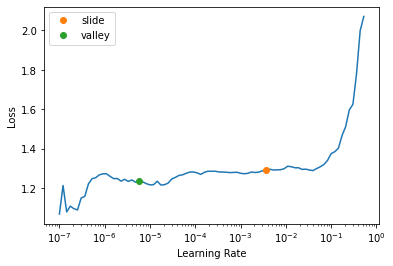

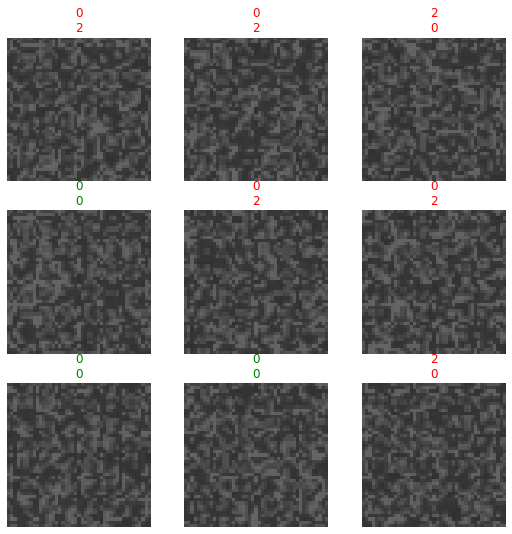

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNet152

In [ ]:
architecture = 'resnet152'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.791415,0.887872,0.486568,02:11


epoch,train_loss,valid_loss,accuracy,time
0,0.708212,0.759504,0.494190,02:32
1,0.699514,0.757701,0.495814,02:27
2,0.704283,0.704584,0.496064,02:30
3,0.703634,0.739241,0.502187,02:30
4,0.701025,0.708240,0.500562,02:30
5,0.700650,0.803009,0.488442,02:30
6,0.697848,0.704913,0.501062,02:31
7,0.696654,0.721494,0.496064,02:27


In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#densenet121

In [ ]:
architecture = 'densenet121'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#darknet53

In [ ]:
architecture = 'darknet53'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#pnasnet5large

In [ ]:
architecture = 'pnasnet5large'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNext101_64x4d

In [ ]:
architecture = 'resnext101_64x4d'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()